In [10]:
!pip install matplotlib
!pip install pandas
!pip install scikit-learn

In [11]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [12]:
def fisher_classifier_two_features():
    # Load the Iris dataset
    iris_data = load_iris()
    iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
    iris_df['target'] = iris_data.target  # Add the target variable to the DataFrame
    
    # Select two features: Let's choose 'sepal length (cm)' and 'sepal width (cm)'
    X = iris_df[['sepal length (cm)', 'sepal width (cm)']].values
    y = iris_df['target'].values

    # Compute the means of each class
    means = np.array([X[y == c].mean(axis=0) for c in np.unique(y)])

    # Compute the within-class scatter matrix (Sw)
    Sw = np.zeros((2, 2))
    for c in np.unique(y):
        X_c = X[y == c]
        mean_c = means[c]
        Sw += np.dot((X_c - mean_c).T, (X_c - mean_c))

    # Compute the between-class scatter matrix (Sb)
    overall_mean = X.mean(axis=0)
    Sb = np.zeros((2, 2))
    for c in np.unique(y):
        n_c = np.sum(y == c)
        mean_c = means[c]
        Sb += n_c * np.outer(mean_c - overall_mean, mean_c - overall_mean)

    # Compute the Fisher's criterion (LDA projection)
    w = np.linalg.inv(Sw).dot(overall_mean - means[0])  # For two classes, take the difference between the two means

    # Plot the data and the Fisher line
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, label='Iris data')
    plt.plot([X[:, 0].min(), X[:, 0].max()], [X[:, 1].min(), X[:, 1].max()], color='red', label='Fisher Line')
    plt.xlabel('Sepal Length (cm)')
    plt.ylabel('Sepal Width (cm)')
    plt.title('Fisher Classifier with Two Features')
    plt.legend()
    plt.show()

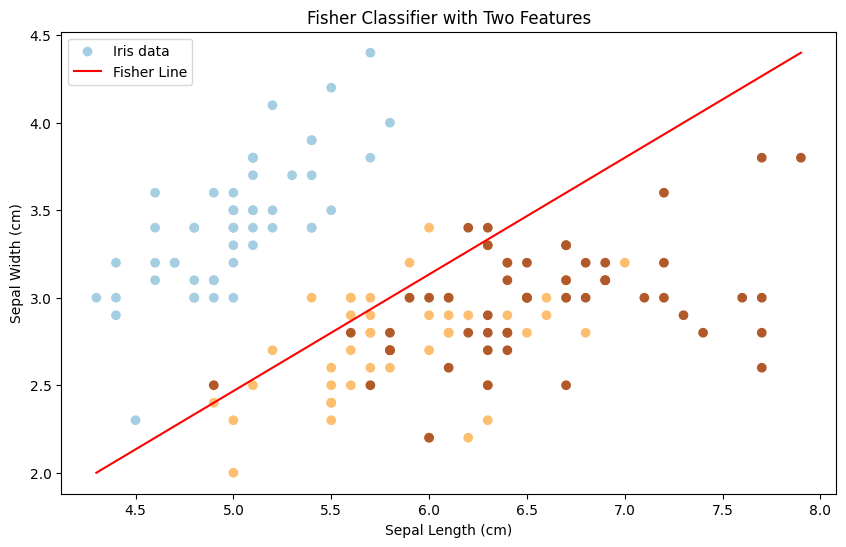

In [13]:
# Run the function
fisher_classifier_two_features()